In [48]:
# Gradient Descent

In [58]:
import numpy as np

# values are from the range 0 to 2
X = 2*np.random.random((100,1))

In [59]:
# y according to the line with some noise

y = 4 + 3 * X + .3*np.random.random((100,1))

In [60]:
y[:3]

array([[5.6665999],
       [6.344213 ],
       [5.1840811]])

In [61]:
x[:3]

array([[0.45961807],
       [0.25190995],
       [0.88209696]])

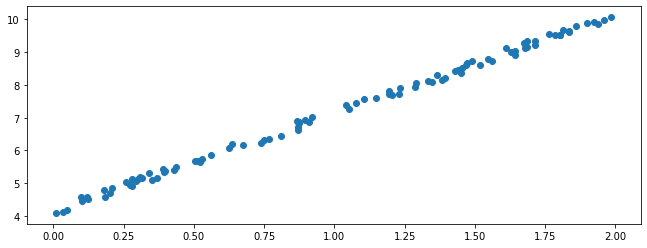

In [62]:
from matplotlib import pyplot as plt

# figure size 11 inches width and 4 inches height
plt.figure(figsize=(11,4))
plt.scatter(X,y)
plt.show()

#fig, ax = plt.subplots(figsize=(11,4))
#ax.plot(x,y)

#fig.savefig("test.png")

In [90]:
def sum(*args):
    s = 0
    for i in args:
        s+=i
    return s

In [76]:
def diff(fn,x):
    delta = 0.00000000001
    y = fn(x)
    
    x1= x+delta
    y1=fn(x1)
    
    return (y1-y)/delta

In [84]:
def error(m,c,X,y):
    ypredicted = m*X + c
    err = ypredicted - y
    return np.sum(err*err)

In [103]:
def diffp(fn,idx,*args):
    delta = 0.000000000001
    y = fn(*args)
    
    args = list(args)
    args[idx] += delta
    
    y1= fn(*args)
    
    return (y1-y)/delta

In [97]:
error(3,4,np.array([1,2,3]),np.array([1,2,3]))

200

In [92]:
error(3,4,X,y)

3.0386687221619564

In [93]:
error(3.04,4,X,y)

2.051537952841875

In [126]:
def grad_fit(X,y):
    m = np.random.random()
    c = np.random.random()
    learning_rate = 0.001
    for i in range (100):
        
        #print("ith", i, "iteration: Error ", error(m,c,X,y))
        dE_dm = diffp(error,0,m,c,X,y)
        dE_dc = diffp(error,1,m,c,X,y)
        
        m = m - learning_rate*dE_dm
        c = c - learning_rate*dE_dc
        
    return (m,c)

In [127]:
m, c = grad_fit(X,y)
m,c

(3.028781435845956, 4.115367111135537)

/usr/local/anaconda/envs/tensorflow2/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


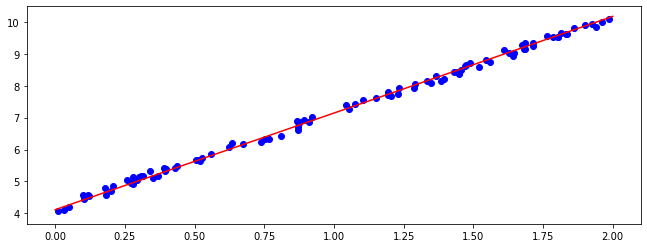

In [130]:
from matplotlib import pyplot as plt

x1=0
x2=2


# m and c: (3.0241528672739, 4.1209880945435415) respectively
y1 = m*x1 + c
y2 = m*x2 + c

plt.figure(figsize=(11,4))
plt.subplot()

plt.plot([x1,x2],[y1,y2],color= 'r')
plt.subplot()

plt.scatter(X,y,color='b')
plt.show()

In [135]:
## generate data

X = np.random.random((100,1))
y = 4 + 3 * X + .3 * np.random.random((100,1))


In [136]:
def neuron(w11,w12,x):
    r = w11*x + w12
    return r

def forward_nn(w11,w12,w21,w22,x):
    y1=neuron(w11,w12,x)
    o1=neuron(w21,w22,y1)
    return o1

def sq_error(o1,yy):
    err = o1-yy
    return (err*err)

def error_nn(w11,w12,w21,w22,x,yy):
    o1 = forward_nn(w11,w12,w21,w22,x)
    err = o1-yy
    return (err*err)


In [138]:
w11 = .5
w12 = .5
w21 = .5
w22 = .5

learning_rate = 0.001

for epoch in range (100):
    for i in range(len(X)):
        x = X[i]
        yy = y[i]
        
        dE_dw11 = diffp(error_nn,0,w11,w12,w21,w22,x,yy)
        dE_dw12 = diffp(error_nn,1,w11,w12,w21,w22,x,yy)
        dE_dw21 = diffp(error_nn,2,w11,w12,w21,w22,x,yy)
        dE_dw22 = diffp(error_nn,3,w11,w12,w21,w22,x,yy)
        
        
        # trying to find out perfect value of w11,w12,w21,w22 for best model
        w11 = w11 - learning_rate*dE_dw11
        w12 = w12 - learning_rate*dE_dw12
        w21 = w21 - learning_rate*dE_dw21
        w22 = w22 - learning_rate*dE_dw22

In [139]:
ycap = forward_nn(w11,w12,w21,w22,X)

/usr/local/anaconda/envs/tensorflow2/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


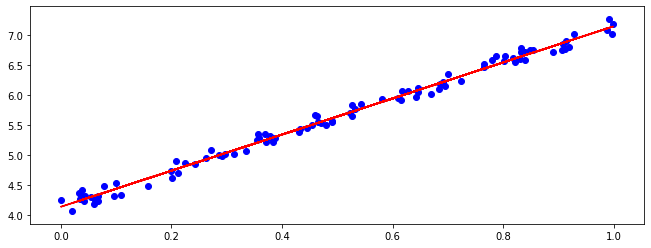

In [140]:
plt.figure(figsize=(11,4))
plt.subplot()

plt.plot(X,ycap,color= 'r')
plt.subplot()

plt.scatter(X,y,color='b')
plt.show()

In [4]:
## Further improvements on backpropagation
import numpy as np

X = np.random.random((100,1))
y = 4 + 3 * X + .3 * np.random.random((100,1))

w11 = .5
w12 = .5
w21 = .5
w22 = .5

def neuron(w11,w12,x):
    # have not used activation function
    r = w11*x + w12
    return r

def sq_error(o1,yy):
    err = o1-yy
    return (err*err)

def diffp(fn,idx,*args):
    delta = 0.000000000001
    y = fn(*args)
    
    args = list(args)
    args[idx] += delta
    
    y1= fn(*args)
    
    return (y1-y)/delta

# learning rate
eta = 0.01

In [7]:

for epoch in range (50):
    for i in range(len(X)):
        x = X[i]
        yy = y[i]
        
        h1 = neuron(w11,w12,x) # intermediate output
        o1 = neuron(w21,w22,h1) # final output
        
        dE_do1 = diffp(sq_error,0,o1,yy)
        do1_dw21 = diffp(neuron,0,w21,w22,h1)
        dE_dw21 = dE_do1*do1_dw21
        
        do1_dw22 = diffp(neuron,1,w21,w22,h1)
        dE_dw22 = dE_do1*do1_dw22
        
        do1_dh = diffp(neuron,2,w21,w22,h1)
        dE_dh = dE_do1 * do1_dh
        dh_dw11 = diffp(neuron,0,w11,w12,x)
        dE_dw11 = dE_dh * dh_dw11
        
        dh_dw12 = diffp(neuron,1,w11,w12,x)
        dE_dw12 = dE_do1 * do1_dh * dh_dw12
        
        # trying to find out perfect value of w11,w12,w21,w22 for best model
        w11 = w11 - eta * dE_dw11
        w12 = w12 - eta * dE_dw12
        w21 = w21 - eta * dE_dw21
        w22 = w22 - eta * dE_dw22

/usr/local/anaconda/envs/tensorflow2/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


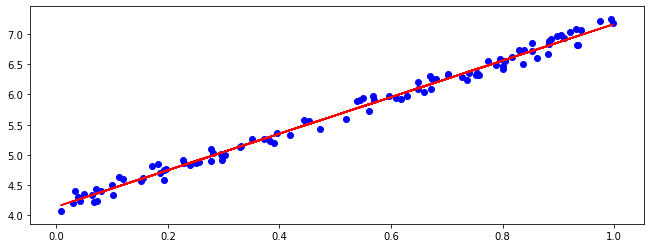

In [13]:
from matplotlib import pyplot as plt

h1 = neuron(w11,w12,X)
ycap1 = neuron(w21,w22,h1)


plt.figure(figsize=(11,4))
plt.subplot()

plt.plot(X,ycap1,color= 'r')
plt.subplot()

plt.scatter(X,y,color='b')
plt.show()